# 🎬 Final Project – Data Analysis on Latest Movies Dataset (2025)

**Dataset Used:** Latest 2025 Movies Datasets.csv  

---



In [2]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt

# To show plots inside notebook
%matplotlib inline

# Load the CSV file
df = pd.read_csv("Latest 2025 movies Datasets.csv")

# Look at first 5 rows
df.head()


,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


In [3]:
# Check rows, columns, data types, null values
df.info()

# Basic statistics for numeric columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   release_date       9951 non-null   object 
 3   original_language  10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   vote_count         10000 non-null  int64  
 6   vote_average       10000 non-null  float64
 7   overview           9758 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


,Unnamed: 0,popularity,vote_count,vote_average
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,7.085813,1470.490600,5.538950
std,2886.89568,16.379058,3405.494983,2.417306
min,0.00000,2.616700,0.000000,0.000000
25%,2499.75000,4.499975,4.000000,5.113750
50%,4999.50000,4.975350,71.000000,6.300000
75%,7499.25000,6.172225,1173.250000,7.011000
max,9999.00000,1096.665400,38078.000000,10.000000


In [4]:
# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Create year and month columns
df["year"] = df["release_date"].dt.year
df["month"] = df["release_date"].dt.month

# Check if created correctly
df[["title", "release_date", "year", "month"]].head()


,title,release_date,year,month
0,Our Fault,2025-10-15,2025.0,10.0
1,Inside Furioza,2025-10-14,2025.0,10.0
2,Captain Hook - The Cursed Tides,2025-07-11,2025.0,7.0
3,War of the Worlds,2025-07-29,2025.0,7.0
4,The Conjuring: Last Rites,2025-09-03,2025.0,9.0


In [5]:
# Check missing values in each column
df.isna().sum()


Unnamed: 0             0
title                  0
release_date          49
original_language      0
popularity             0
vote_count             0
vote_average           0
overview             242
year                  49
month                 49
dtype: int64

In [6]:
# Drop rows where key values are missing
# (you can adjust columns based on what exists in your CSV)
df_clean = df.dropna(subset=["release_date", "popularity", "vote_average"])

# Check shape before and after
print("Original shape:", df.shape)
print("After cleaning:", df_clean.shape)


Original shape: (10000, 10)
After cleaning: (9951, 10)


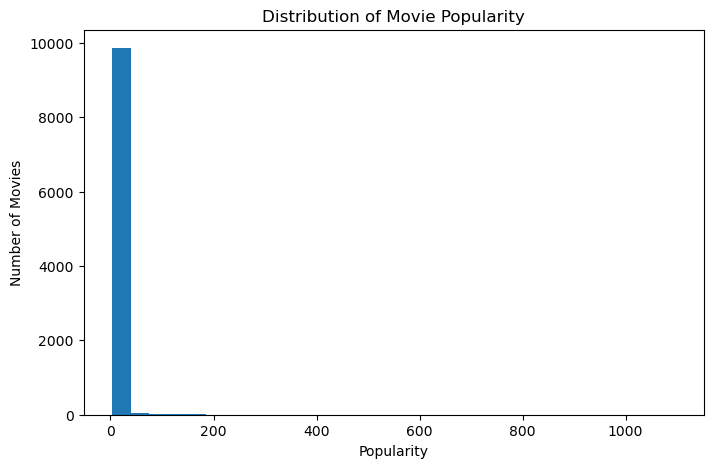

In [7]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["popularity"], bins=30)
plt.title("Distribution of Movie Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Movies")
plt.show()


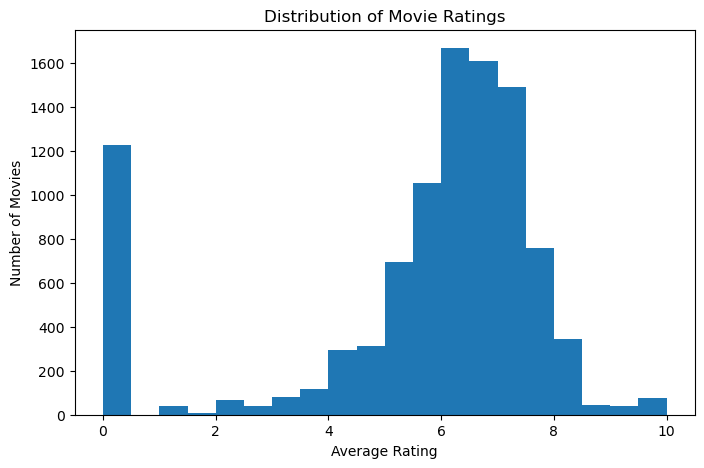

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df_clean["vote_average"], bins=20)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()


original_language
en    6472
fr     603
ja     416
es     411
ko     256
it     237
pt     174
de     147
hi     127
tl     126
Name: count, dtype: int64


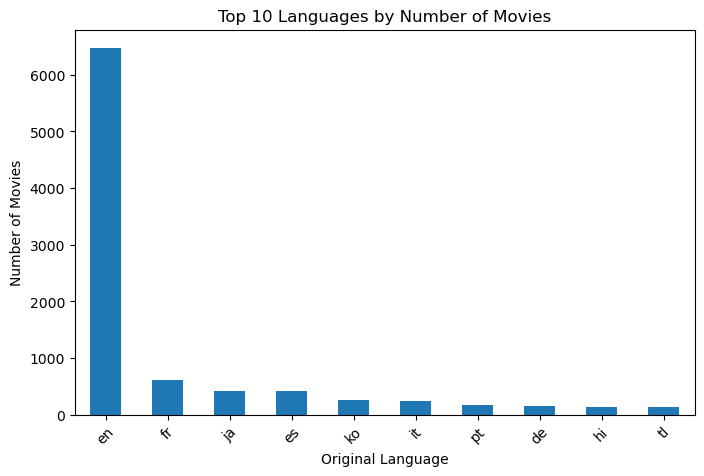

In [9]:
# Count of movies by language
lang_counts = df_clean["original_language"].value_counts().head(10)
print(lang_counts)

plt.figure(figsize=(8,5))
lang_counts.plot(kind="bar")
plt.title("Top 10 Languages by Number of Movies")
plt.xlabel("Original Language")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


original_language
th    6.556056
cn    6.354734
zh    6.195984
ja    6.170613
no    6.026862
ko    5.975723
ml    5.835280
hi    5.824732
en    5.721707
ru    5.693938
fr    5.366466
es    5.255813
it    5.224511
nl    5.151378
tl    4.981278
te    4.917049
id    4.801111
da    4.683435
pl    4.584630
ta    4.505067
pt    4.453644
sv    4.391830
de    3.999333
tr    3.621318
cs    3.264981
Name: vote_average, dtype: float64


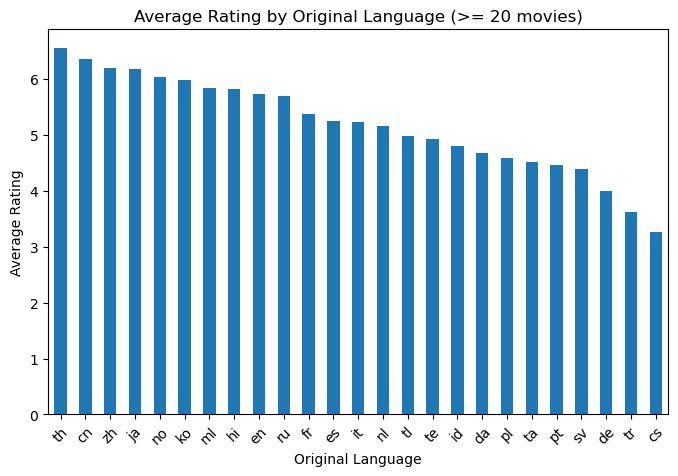

In [10]:
# Average rating by language
avg_rating_lang = df_clean.groupby("original_language")["vote_average"].mean()

# Filter languages that appear at least 20 times (you can change this)
language_counts = df_clean["original_language"].value_counts()
common_lang = language_counts[language_counts >= 20].index

avg_rating_common_lang = avg_rating_lang[common_lang].sort_values(ascending=False)
print(avg_rating_common_lang)

plt.figure(figsize=(8,5))
avg_rating_common_lang.plot(kind="bar")
plt.title("Average Rating by Original Language (>= 20 movies)")
plt.xlabel("Original Language")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


month
1.0     5.474639
2.0     6.093354
3.0     6.343626
4.0     6.557815
5.0     6.723218
6.0     7.721369
7.0     8.640055
8.0     7.109908
9.0     8.167475
10.0    9.035067
11.0    6.281980
12.0    6.453308
Name: popularity, dtype: float64


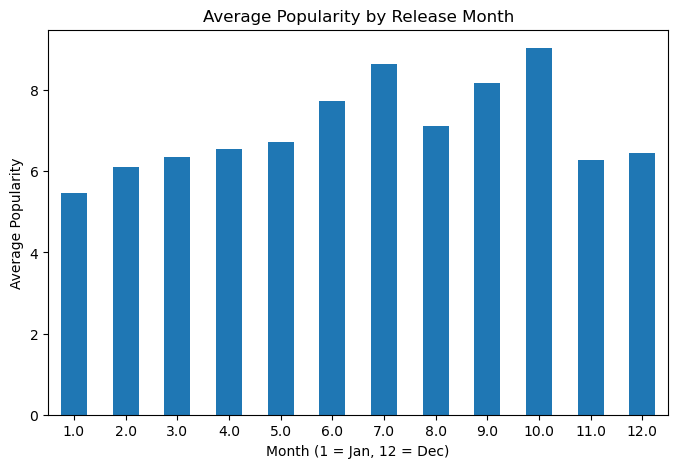

In [11]:
# Group by month and get mean popularity
monthly_popularity = df_clean.groupby("month")["popularity"].mean()

print(monthly_popularity)

plt.figure(figsize=(8,5))
monthly_popularity.plot(kind="bar")
plt.title("Average Popularity by Release Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Popularity")
plt.xticks(rotation=0)
plt.show()


month
1.0      998
2.0      596
3.0      823
4.0      697
5.0      721
6.0      819
7.0      748
8.0      782
9.0      956
10.0    1058
11.0     825
12.0     928
Name: count, dtype: int64


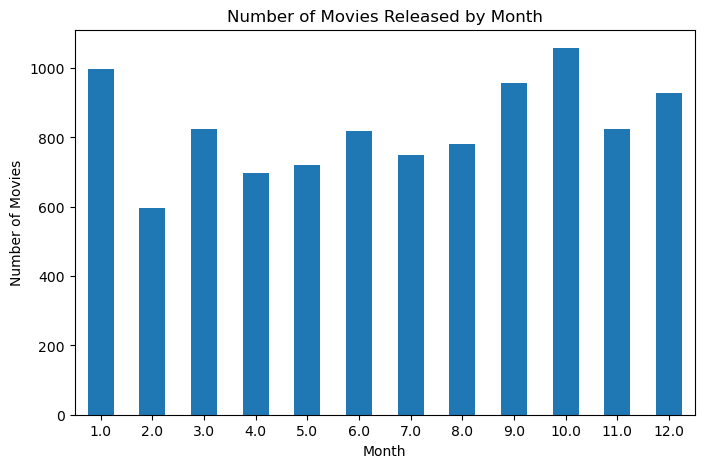

In [12]:
monthly_count = df_clean["month"].value_counts().sort_index()
print(monthly_count)

plt.figure(figsize=(8,5))
monthly_count.plot(kind="bar")
plt.title("Number of Movies Released by Month")
plt.xlabel("Month")
plt.ylabel("Number of Movies")
plt.xticks(rotation=0)
plt.show()


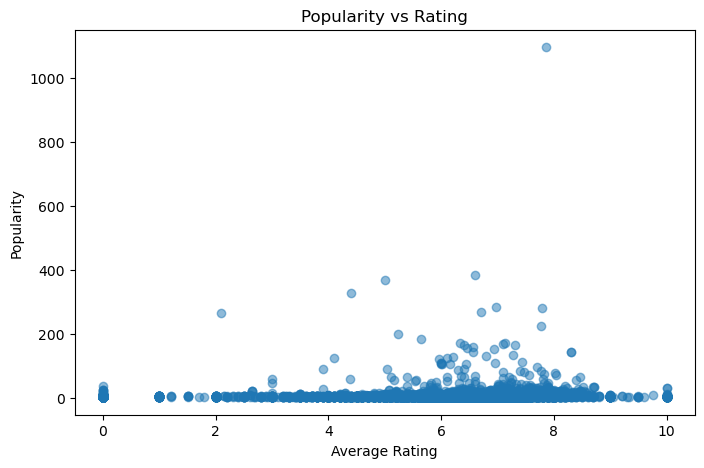

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(df_clean["vote_average"], df_clean["popularity"], alpha=0.5)
plt.title("Popularity vs Rating")
plt.xlabel("Average Rating")
plt.ylabel("Popularity")
plt.show()


In [14]:
# Select only numeric columns
numeric_df = df_clean.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = numeric_df.corr()
corr


,Unnamed: 0,popularity,vote_count,vote_average,year,month
Unnamed: 0,1.000000,-0.234252,-0.420045,-0.295252,-0.229094,-0.070608
popularity,-0.234252,1.000000,0.089355,0.069016,0.092606,0.032762
vote_count,-0.420045,0.089355,1.000000,0.281093,0.076711,0.061773
vote_average,-0.295252,0.069016,0.281093,1.000000,0.199611,0.091639
year,-0.229094,0.092606,0.076711,0.199611,1.000000,0.041410
month,-0.070608,0.032762,0.061773,0.091639,0.041410,1.000000


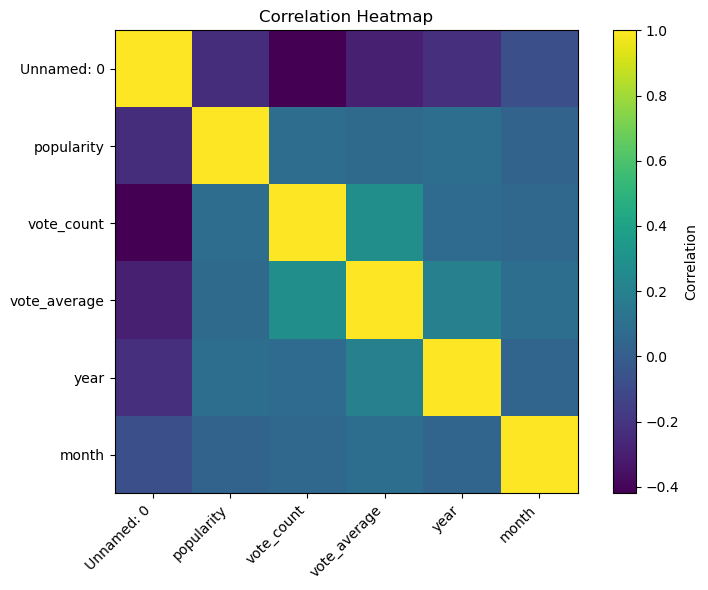

In [15]:
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar(label="Correlation")
plt.tight_layout()
plt.show()


In [16]:
top_popular = df_clean.sort_values(by="popularity", ascending=False).head(10)
top_popular[["title", "original_language", "popularity", "vote_average", "vote_count"]]


,title,original_language,popularity,vote_average,vote_count
0,Our Fault,es,1096.6654,7.869,302
1,Inside Furioza,pl,384.3220,6.593,27
2,Captain Hook - The Cursed Tides,en,370.1091,5.000,15
3,War of the Worlds,en,327.8760,4.400,642
4,The Conjuring: Last Rites,en,284.0186,6.972,1065
5,Demon Slayer: Kimetsu no Yaiba Infinity Castle,ja,280.8270,7.786,472
6,Stolen Girl,en,268.6810,6.700,30
7,Martin,kn,266.9326,2.100,8
8,My Fault,es,224.8350,7.766,3867
9,War 2,hi,201.2363,5.241,29


In [17]:
# Filter movies with at least 50 votes (to ignore movies with 1–2 fake votes)
filtered_votes = df_clean[df_clean["vote_count"] >= 50]

top_rated = filtered_votes.sort_values(by="vote_average", ascending=False).head(10)
top_rated[["title", "original_language", "popularity", "vote_average", "vote_count"]]


,title,original_language,popularity,vote_average,vote_count
9214,Succubus,en,4.3223,9.056,186
2361,My First Client,ko,5.8235,8.717,92
99,The Shawshank Redemption,en,34.5159,8.713,29049
123,The Shawshank Redemption,en,34.5159,8.713,29048
121,The Godfather,en,33.6551,8.686,21950
2894,The King of Kings,en,5.7899,8.600,102
1099,Young Hearts,nl,8.7939,8.600,145
2970,Michael Jackson: Live in Bucharest - The Dange...,en,5.7793,8.600,126
2952,The King of Kings,en,5.7899,8.600,102
289,The Godfather Part II,en,17.5852,8.571,13263
